# Sprint 1

# Import the Required Libraries

In [1]:
from keras.utils import np_utils #used for one-hot encoding
from tensorflow.keras.datasets import mnist #mnist dataset

# Loading the Data

In [2]:
#splitting the mnist data into train and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#shape is used to give the dimension values
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Analyzing the Data

In [4]:
#printing the first image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
#printing label of first image
y_train[0]

5

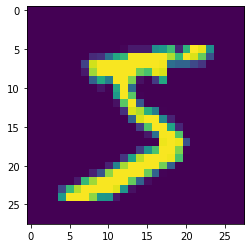

In [6]:
#used for data visualization
import matplotlib.pyplot as plt
#plotting the index=0 image
plt.imshow(X_train[0])

# Reshaping Dataset 

In [7]:
#Reshaping to format which CNN expects(batch, height, width, channels)
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

# Applying One Hot Encoding

In [8]:
#storing the number of classes in a variable
number_of_classes = 10
#converts the output into binary format(0's and 1's)
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
#printing the label after conversion
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Sprint 2

# Add CNN Layers

In [10]:
#it is a plain stack of layers
from tensorflow.keras.models import Sequential

#A layer consists of a tensor-in tensor-out computation function
from tensorflow.keras import layers

#Dense-Dense Layer is the regular deeply connected neural network
#Flatten-used for flattening the input or change the dimension
from tensorflow.keras.layers import Dense, Flatten

#Convolutional Layer
from tensorflow.keras.layers import Conv2D

#optimizer
from keras.optimizers import Adam

In [11]:
#creating the model
model = Sequential()

#adding the model layers
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))

#flatten the dimesions of the image
model.add(Flatten())

#output layer with 10 neurons
model.add(Dense(number_of_classes, activation="softmax"))

# Compiling the Model

In [12]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

# Train the Model

In [13]:
#fit the model
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 156s 83ms/step - loss: 0.2315 - accuracy: 0.9485 - val_loss: 0.1089 - val_accuracy: 0.9655
Epoch 2/5
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0684 - accuracy: 0.9796 - val_loss: 0.1011 - val_accuracy: 0.9709
Epoch 3/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0492 - accuracy: 0.9845 - val_loss: 0.0900 - val_accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0970 - val_accuracy: 0.9777
Epoch 5/5
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0274 - accuracy: 0.9908 - val_loss: 0.1009 - val_accuracy: 0.9765


# Observing the metrics

In [14]:
#evaluation of the model
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.1009373664855957, 0.9764999747276306]


# Test the Model

In [15]:
#slicing the first 4 images from x_test data and printing the predicted output
prediction = model.predict(X_test[:10])
print(prediction)

1/1 [==============================] - 0s 171ms/step
[[3.87378965e-14 1.22201112e-20 2.70703626e-13 1.01162767e-11
  2.68388663e-16 4.12979437e-16 8.89591264e-24 1.00000000e+00
  5.69351892e-11 3.61267418e-12]
 [3.04165276e-13 2.24705603e-13 1.00000000e+00 6.86506143e-15
  2.97049034e-13 1.62425163e-21 1.51806814e-11 1.54766518e-17
  8.39281918e-15 7.23848821e-22]
 [1.01410803e-10 9.99964952e-01 7.97218547e-07 4.06620987e-11
  3.41548584e-05 1.55060619e-07 4.07343104e-10 2.16682805e-09
  1.29432687e-08 3.78075100e-08]
 [1.00000000e+00 5.05753447e-17 8.09822858e-13 1.69388908e-15
  2.66154947e-15 7.91606228e-14 2.50689313e-12 1.39006433e-14
  1.56500409e-13 1.59382096e-09]
 [1.63105071e-13 4.77125824e-16 1.14359668e-11 8.83585807e-14
  1.00000000e+00 3.45050513e-13 2.61946262e-18 2.15790927e-12
  2.41069317e-13 9.99037866e-11]
 [5.47705145e-11 9.99919415e-01 1.26692230e-08 5.01515366e-12
  5.79868174e-06 2.05035099e-12 4.36350961e-13 7.18247611e-05
  2.28491757e-07 2.59825993e-06]
 [2.3

In [16]:
import numpy as np

#printing our labels from first 4 images
print(np.argmax(prediction, axis=1))

#printing the actual labels
print(Y_test[:10])


[7 2 1 0 4 1 4 9 5 9]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Sprint 3

# Save the model

In [17]:
#Save the model
model.save("model.h5")

# Test with Saved Model

In [1]:
#importing the keras libraries and packages
from tensorflow.keras.models import load_model

#loading the model
model=load_model(r'model.h5')

#used for manipulating image uploaded by the user
from PIL import Image

#used for numerical analysis
import numpy as np

for index in range(4):
    #convert image to required format
    img=Image.open('test0.png').convert("L")
    
    #resizing of input image
    img = img.resize((28, 28))
    
    #converting to image
    img2arr = np.array(img)
    
    #reshaping according to our requirement
    img2arr = img2arr.reshape(1, 28, 28, 1)

    #Predicting the Test set results
    y_pred=model.predict(img2arr)
    print(y_pred)
    print(np.argmax(y_pred, axis=1))

1/1 [==============================] - 0s 198ms/step
[[0.09645228 0.10865606 0.08577293 0.13518178 0.07421888 0.18881202
  0.08243676 0.04284775 0.07271596 0.1129057 ]]
[5]
1/1 [==============================] - 0s 38ms/step
[[0.09645228 0.10865606 0.08577293 0.13518178 0.07421888 0.18881202
  0.08243676 0.04284775 0.07271596 0.1129057 ]]
[5]
1/1 [==============================] - 0s 36ms/step
[[0.09645228 0.10865606 0.08577293 0.13518178 0.07421888 0.18881202
  0.08243676 0.04284775 0.07271596 0.1129057 ]]
[5]
1/1 [==============================] - 0s 39ms/step
[[0.09645228 0.10865606 0.08577293 0.13518178 0.07421888 0.18881202
  0.08243676 0.04284775 0.07271596 0.1129057 ]]
[5]
